In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2

In [3]:
!python --version

Python 3.7.12


In [2]:
import cv2

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [1]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)


In [2]:
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 10.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77734 sha256=f66859893355863c3f22a1e1f662b4d083cdf61344dbfd3bf500e5e9b497e3db
  Stored in directory: /home/jupyter/.cache/pip/wheels/fd/97/a6/3372cb23468915cbcf108338dd29c73379fd1a55828ec608ba
Successfully built kaggle


In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-44c")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  faridashahata


Your Kaggle Key:

  ········


100%|██████████| 188M/188M [00:03<00:00, 51.4MB/s] 


In [5]:
import os

In [6]:
os.listdir()

['.git',
 'preprocessing.ipynb',
 'brain-tumor-processed',
 'brain-tumor.ipynb',
 '.gitignore',
 'brain-tumor-mri-images-44c',
 'preprocessing.py',
 'data_explorer.ipynb',
 'README.md',
 '.ipynb_checkpoints',
 'resize_images.py']

In [16]:
os.getcwd()

'/home/jupyter'

In [7]:
from PIL import Image
import numpy as np

In [36]:
path_extract = "brain-tumor-mri-images-44c/_NORMAL T1/"
filenames = os.listdir("brain-tumor-mri-images-44c/_NORMAL T1")
scans = []
print(filenames[0])
for f in filenames:
#print(f)
    img = Image.open(path_extract + f)
    #print("IMG", img)
    matrix = np.array(img)
    #print("MATRIX", matrix)
    scans.append(matrix)

e96d71e8b4d9825c3d82fec0097cbf_big_gallery.jpeg


In [122]:
scans[0].shape

(630, 630)

In [10]:
training_data = []

path_extract = "brain-tumor-mri-images-44c/"
filenames = os.listdir("brain-tumor-mri-images-44c/")

for category in filenames:
    path = os.path.join(path_extract, category)
    #print(os.listdir(path))
    for image in tqdm(os.listdir(path)):
        im_path = os.path.join(path, image)
        img = Image.open(im_path)
    #print("IMG", img)
        matrix = np.array(img)
        class_num = filenames.index(category)
        # print("category:", category)
        # print("class number:", class_num)
        # print(matrix.shape)
        # plt.imshow(img, cmap='gray')  # graph it
        # plt.show() 
        
        scaled_image = skimage.transform.resize(
            matrix, (224, 224),
            order=1,
            mode='constant',
            preserve_range=True)
        # plt.imshow(scaled_image, cmap='gray')  # graph it
        # plt.show() 
    #print("MATRIX", matrix)
        training_data.append([scaled_image, class_num])
        

100%|██████████| 84/84 [00:02<00:00, 36.63it/s]


In [9]:
import skimage

In [11]:
len(training_data)

4479

In [12]:
training_data[0]

[array([[[ 8.78216792,  8.78216792,  8.78216792],
         [ 9.37125391,  9.37125391,  9.37125391],
         [ 9.37132217,  9.37132217,  9.37132217],
         ...,
         [ 9.37132217,  9.37132217,  9.37132217],
         [ 9.37125391,  9.37125391,  9.37125391],
         [ 8.78216792,  8.78216792,  8.78216792]],
 
        [[ 9.37125391,  9.37125391,  9.37125391],
         [ 9.99985432,  9.99985432,  9.99985432],
         [ 9.99992716,  9.99992716,  9.99992716],
         ...,
         [ 9.99992716,  9.99992716,  9.99992716],
         [ 9.99985432,  9.99985432,  9.99985432],
         [ 9.37125391,  9.37125391,  9.37125391]],
 
        [[ 9.37132217,  9.37132217,  9.37132217],
         [ 9.99992716,  9.99992716,  9.99992716],
         [10.        , 10.        , 10.        ],
         ...,
         [10.        , 10.        , 10.        ],
         [ 9.99992716,  9.99992716,  9.99992716],
         [ 9.37132217,  9.37132217,  9.37132217]],
 
        ...,
 
        [[ 9.37132217,  9.37132217

In [17]:
training_data[0][0].shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


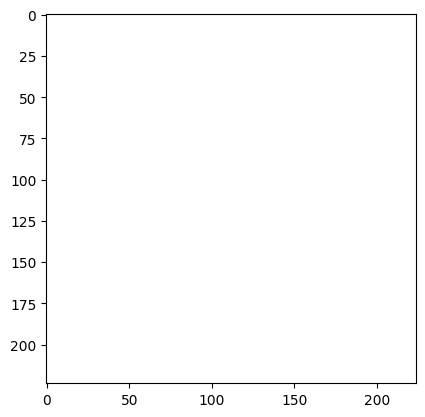

In [18]:
plt.imshow(training_data[0][0], cmap='gray')  # graph it
plt.show()

  0%|          | 0/48 [00:00<?, ?it/s]

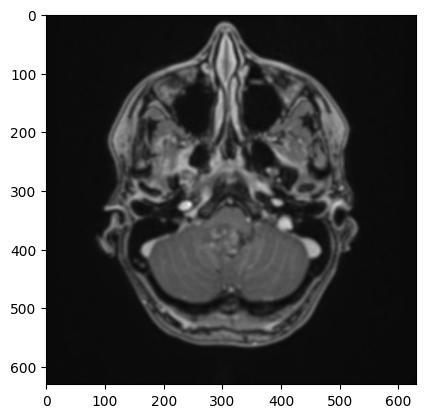

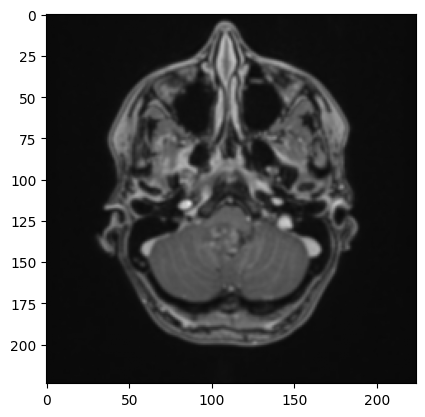

  0%|          | 0/48 [00:00<?, ?it/s]


In [21]:
for category in filenames:
    path = os.path.join(path_extract, category)
    #print(os.listdir(path))
    for image in tqdm(os.listdir(path)):
        im_path = os.path.join(path, image)
        img = Image.open(im_path)
    #print("IMG", img)
        matrix = np.array(img)
        class_num = filenames.index(category)
        # print("category:", category)
        # print("class number:", class_num)
        #print(matrix.shape)
        plt.imshow(img, cmap='gray')  # graph it
        plt.show() 
        
        scaled_image = skimage.transform.resize(
            matrix, (224, 224),
            order=1,
            mode='constant',
            preserve_range=True)
        plt.imshow(scaled_image/255, cmap='gray')  # graph it
        plt.show() 
        break
    break
    #print("MATRIX", matrix)
        #training_data.append([scaled_image, class_num])
        

In [22]:
training_data[0][0].shape

(224, 224, 3)

In [2]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 19.3 MB/s eta 0:00:0000:0100:01


In [23]:
X = []
y = []

for image in training_data:
   
    X.append(image[0])
   
    y.append(image[1])

# for features,label in training_data:
#     X.append(features)
#     y.append(label)

#print(X[0].reshape(-1, 224, 224, 1))

X = np.array(X).reshape(-1, 224, 224, 1)


/opt/conda/bin/ipython:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: could not broadcast input array from shape (224,224,3) into shape (224,224)

In [117]:
X[0].shape

(224, 224)

In [23]:
filenames[0]

'_NORMAL T1'

In [38]:
len(scans)

251

In [39]:
scans[0].shape

(630, 630)

In [40]:
import skimage.transform

In [42]:
 image = skimage.transform.resize(
            scans[0], (224, 224),
            order=1,
            mode='constant',
            preserve_range=True)


In [44]:
image.shape

(224, 224)

### NIH CHEST X-RAYS:

In [ ]:
od.download("https://www.kaggle.com/datasets/nih-chest-xrays/data")




Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  faridashahata


Your Kaggle Key:

  ········


100%|██████████| 42.0G/42.0G [07:48<00:00, 96.2MB/s]


In [ ]:
#https://www.kaggle.com/datasets/nih-chest-xrays/data

In [ ]:
# follow this to build training data:
# https://www.kaggle.com/code/mekhdigakhramanian/loading-in-your-own-data-tensorflow-and-keras-p-2




In [123]:
path = "./data"
folder = [ x for x in os.listdir(path) if os.path.isdir(os.path.join(path,x))]

paths_to_subfolders = [path+"/"+ i for i in folder]
paths_to_images = [j + "/images" for j in paths_to_subfolders]

In [124]:
paths_to_images

['./data/images_010/images',
 './data/images_011/images',
 './data/images_008/images',
 './data/images_007/images',
 './data/images_012/images',
 './data/images_004/images',
 './data/images_003/images',
 './data/images_002/images',
 './data/images_006/images',
 './data/images_009/images',
 './data/images_001/images',
 './data/images_005/images']

In [ ]:
image_list = []
training_data_2 = []
for image_path in paths_to_images:
    for image in os.listdir(image_path):
        im_path = os.path.join(image_path, image)
        im=Image.open(im_path)
        image_list.append(im)
        matrix = np.array(im)
        scaled_img = skimage.transform.resize(matrix, (224, 224))
        training_data_2.append(scaled_img)
        #im.close()
len(image_list)
len(training_data_2)

In [ ]:
import pickle

pickle_out = open("training.pickle", "wb")
pickle_dump(training_data, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("training.pickle", "rb")
training = pickle.load(pickle_in)


In [ ]:
# training_data2 = []

# path_extract = "data/"
# filenames = os.listdir("brain-tumor-mri-images-44c/")

# for category in filenames:
#     path = os.path.join(path_extract, category)
#     #print(os.listdir(path))
#     for image in tqdm(os.listdir(path)):
#         im_path = os.path.join(path, image)
#         img = Image.open(im_path)
#     #print("IMG", img)
#         matrix = np.array(img)
#         class_num = filenames.index(category)
#         # print("category:", category)
#         # print("class number:", class_num)
#         # print(matrix.shape)
#         # plt.imshow(img, cmap='gray')  # graph it
#         # plt.show() 
        
#         scaled_image = skimage.transform.resize(
#             matrix, (224, 224),
#             order=1,
#             mode='constant',
#             preserve_range=True)
#         # plt.imshow(scaled_image, cmap='gray')  # graph it
#         # plt.show() 
#     #print("MATRIX", matrix)
#         training_data.append([scaled_image, class_num])